In [53]:
%%html
<style>
table {float:left}
</style>

In [54]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('..')
import script.data as data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
ticker = '002371'

In [56]:
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)

In [57]:
change = income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']].pct_change(periods=-1).round(3) * 100
income_change = pd.concat([income[['截止日期', '归属于母公司所有者的净利润', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change.set_index('截止日期')

,归属于母公司所有者的净利润,基本每股收益,稀释每股收益,营业总收入,营业总成本,归属于母公司所有者的净利润
截止日期,,,,,,
2019-12-31,3.090323e+08,0.6708,0.6708,22.1,23.0,32.2
2018-12-31,2.336917e+08,0.5102,0.5102,49.5,30.5,86.0
2017-12-31,1.256102e+08,0.2743,0.2743,37.0,16.6,35.2
2016-12-31,9.290156e+07,0.2202,0.2202,33.0,42.4,46.5
2015-12-31,6.340795e+07,0.1601,0.1601,26.9,60.1,51.4
2014-12-31,4.187239e+07,0.1200,0.1200,11.9,25.4,-59.4
2013-12-31,1.030924e+08,0.2900,0.2900,-15.1,-12.6,-27.0
2012-12-31,1.411607e+08,0.4400,0.4400,-12.4,-14.8,6.2
2011-12-31,1.329285e+08,0.8700,0.8700,42.7,38.2,76.3


In [58]:
change = incomeq[['营业收入', '归属于母公司所有者的净利润']].pct_change(periods=-4).round(3) * 100
incomeq_change = pd.concat([incomeq[['截止日期', '营业收入', '归属于母公司所有者的净利润']], change], axis=1)
incomeq_change.set_index('截止日期')[:24]

,营业收入,归属于母公司所有者的净利润,营业收入,归属于母公司所有者的净利润
截止日期,,,,
2020-06-30,1.239056e+09,1.575910e+08,30.9,45.0
2020-03-31,9.379406e+08,2.648649e+07,32.5,33.0
2019-12-31,1.321683e+09,8.964251e+07,8.1,37.8
2019-09-30,1.081987e+09,9.082828e+07,53.2,83.0
2019-06-30,9.467043e+08,1.086476e+08,11.1,4.8
2019-03-31,7.079386e+08,1.991384e+07,30.5,29.7
2018-12-31,1.222704e+09,6.504551e+07,81.6,43.4
2018-09-30,7.064058e+08,4.964058e+07,40.0,80.7
2018-06-30,8.523140e+08,1.036461e+08,35.1,102.5


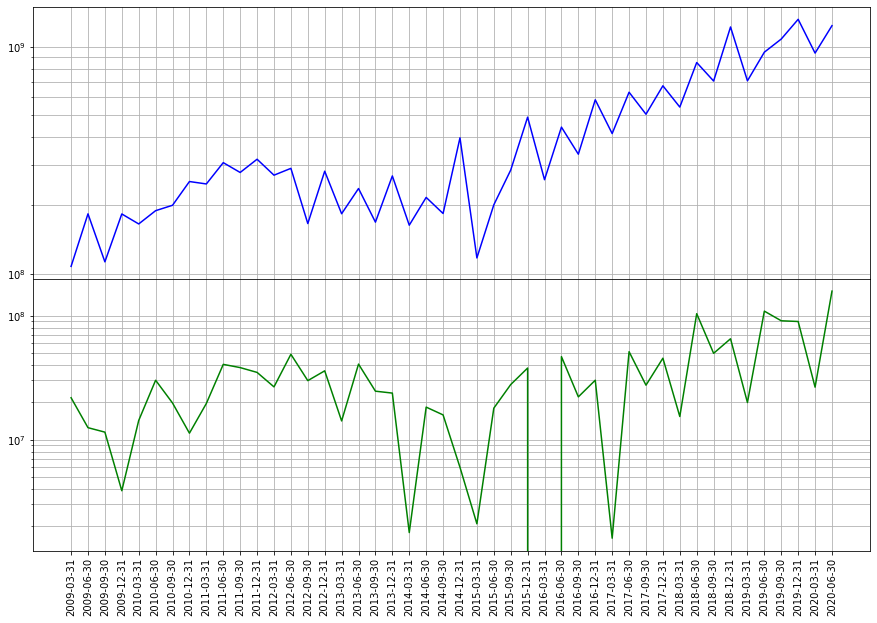

In [59]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['归属于母公司所有者的净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [60]:
df = data.get_market(ticker)
df['前复权'] = df['收盘价'] * df['累积前复权因子']
df.groupby(df['交易日期'].dt.year).agg(['min', 'max'])[-10:]

交易日期               收盘价           累积前复权因子               滚动市盈率  \
            min        max    min     max       min       max       min   
交易日期                                                                      
2011 2011-01-04 2011-12-30  47.30  108.98  0.210636  0.274225   32.0035   
2012 2012-01-04 2012-12-31  23.30   60.20  0.274225  0.494524   28.2945   
2013 2013-01-04 2013-12-31  16.85   38.08  0.494524  0.991657   38.4234   
2014 2014-01-02 2014-12-31  17.74   29.30  0.991657  0.996678   61.4943   
2015 2015-01-05 2015-12-31  16.93   59.60  0.996678  0.996678  142.5353   
2016 2016-01-04 2016-12-30  19.28   43.80  0.996678  0.997411  175.6994   
2017 2017-01-03 2017-12-29  22.34   46.26  0.997411  0.998289   84.6968   
2018 2018-01-02 2018-12-28  26.15   55.89  0.998289  0.998850   80.0464   
2019 2019-01-02 2019-12-31  38.16   93.99  0.998850  0.999626   81.6730   
2020 2020-01-02 2020-10-19  89.11  229.34  0.999626  1.000000  153.7135   

                      前复权              
           max        min         max  
交易日期                                   
2011   87.3517  12.935181   22.955154  
2012   42.4470  11.522400   16.508325  
2013   73.4857  15.231327   22.728775  
2014  219.5342  17.591992   29.202662  
2015  497.5749  16.873756   59.402001  
2016  506.5518  19.215949   43.686592  
2017  232.2851  22.282157   46.180829  
2018  192.3024  26.105246   55.825752  
2019  168.3329  38.116134   93.954824  
2020  359.7855  89.076650  229.340000

In [61]:
income['毛利率'] = (1 - income['营业成本'] / income['营业收入']).round(3) * 100
income['净利率'] = (income['净利润'] / income['营业总收入']).round(3) * 100
income.set_index('截止日期')[['毛利率', '净利率']]

,毛利率,净利率
截止日期,,
2019-12-31,40.5,9.1
2018-12-31,38.4,8.5
2017-12-31,36.6,7.5
2016-12-31,39.7,8.5
2015-12-31,40.7,8.9
2014-12-31,34.6,7.6
2013-12-31,41.9,15.4
2012-12-31,39.4,16.5
2011-12-31,33.4,13.7


#### 净资产收益率
| 年度 | 加权净资产收益率 |
| :------ | ------: |
| 2019 | 8.01% |
| 2018 | 6.83% |